<a href="https://colab.research.google.com/github/mahuamanc/Machine_Learning2/blob/main/regresion_lineal/sidney_data_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerías

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Leyendo data

In [ ]:

pddf = pd.read_csv('house_price_data.csv')
target = 'price'

In [ ]:
pddf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
pddf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
np.percentile(pddf.price, 2)

142486.0

In [ ]:
# Ajuste de la data por existencia de valores incoherentes

pddf = pddf.loc[pddf.price >= 10000]


In [ ]:
#Creamos variables de antiguedad
pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
pddf['ant_built'] = pddf.year - pddf.yr_built
pddf['ant_renovated'] = pddf.year - pddf.yr_renovated.apply(lambda x: None if x == 0 else x)


<ipython-input-41-b3759f070d03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
<ipython-input-41-b3759f070d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf['ant_built'] = pddf.year - pddf.yr_built
<ipython-input-41-b3759f070d03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

<AxesSubplot:>

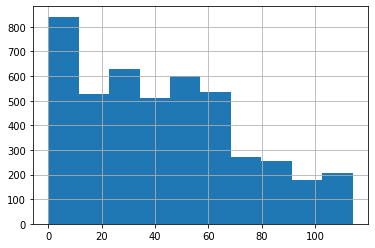

In [ ]:
pddf.ant_built.hist()

In [ ]:
# Este código selecciona las columnas de tipo categóricas
pddf.select_dtypes(include = 'object').columns.tolist()


['date', 'street', 'city', 'statezip', 'country']

In [ ]:

tot_feats = pddf.columns.tolist() #Todas las columnas del dataset
rmv_feats = ['price', 'year', 'yr_built', 'yr_renovated'] #Variables que no nos hacen sentido de incluir
cat_feats = pddf.select_dtypes(include = 'object').columns.tolist() #Variables categóricas

features = list(set(tot_feats) - set(rmv_feats + cat_feats))
data = pddf[features + [target]]


In [ ]:
data.head()

,sqft_living,sqft_lot,bedrooms,waterfront,sqft_above,condition,sqft_basement,view,floors,bathrooms,ant_renovated,ant_built,price
0,1340,7912,3.0,0,1340,3,0,0,1.5,1.50,9.0,59,313000.0
1,3650,9050,5.0,0,3370,5,280,4,2.0,2.50,NaN,93,2384000.0
2,1930,11947,3.0,0,1930,4,0,0,1.0,2.00,NaN,48,342000.0
3,2000,8030,3.0,0,1000,4,1000,0,1.0,2.25,NaN,51,420000.0
4,1940,10500,4.0,0,1140,4,800,0,1.0,2.50,22.0,38,550000.0


## 2. Selección de muestras

In [ ]:
# Muestreo

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               train_size = 0.7, 
                               random_state = 123)


In [ ]:
print(f"Total data size: {data.shape}")
print(f"Total train size: {train.shape}")
print(f"Total test size: {test.shape}")

Total data size: (4550, 13)
Total train size: (3185, 13)
Total test size: (1365, 13)


## Analisis univariado y tratamiento de datos

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

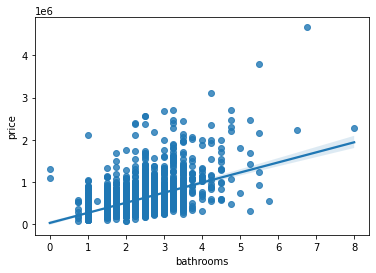

In [ ]:

#sns.relplot(x = 'bathrooms', y = 'price', data = train.loc[train.price<5000000])
sns.regplot(x = 'bathrooms', y = 'price', data = train.loc[train.price<5000000])

In [ ]:
corr_matrix = train.corr()
corr_matrix.reset_index()

,index,sqft_living,sqft_lot,bedrooms,waterfront,sqft_above,condition,sqft_basement,view,floors,bathrooms,ant_renovated,ant_built,price
0,sqft_living,1.000000,0.227602,0.588685,0.124573,0.872278,-0.055878,0.454062,0.321671,0.332886,0.752949,0.073332,-0.279117,0.396258
1,sqft_lot,0.227602,1.000000,0.044483,0.016466,0.240795,-0.032911,0.026342,0.074838,0.009614,0.102201,-0.067352,-0.068143,0.048334
2,bedrooms,0.588685,0.044483,1.000000,-0.010966,0.471809,0.044796,0.343254,0.118504,0.165841,0.548973,0.067724,-0.127423,0.177446
3,waterfront,0.124573,0.016466,-0.010966,1.000000,0.079909,-0.003033,0.108951,0.339409,0.001812,0.050420,-0.011462,0.039923,0.154196
4,sqft_above,0.872278,0.240795,0.471809,0.079909,1.000000,-0.177321,-0.039625,0.175001,0.517045,0.683782,0.126512,-0.397865,0.335910
5,condition,-0.055878,-0.032911,0.044796,-0.003033,-0.177321,1.000000,0.208899,0.062522,-0.281667,-0.119459,0.212902,0.399703,0.031435
6,sqft_basement,0.454062,0.026342,0.343254,0.108951,-0.039625,0.208899,1.000000,0.338433,-0.261851,0.292690,-0.064237,0.154573,0.197667
7,view,0.321671,0.074838,0.118504,0.339409,0.175001,0.062522,0.338433,1.000000,0.030004,0.210306,0.001000,0.065968,0.225895
8,floors,0.332886,0.009614,0.165841,0.001812,0.517045,-0.281667,-0.261851,0.030004,1.000000,0.484961,0.207758,-0.459439,0.132755
9,bathrooms,0.752949,0.102201,0.548973,0.050420,0.683782,-0.119459,0.292690,0.210306,0.484961,1.000000,0.111691,-0.461579,0.303729


In [ ]:
corr_matrix = train.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'correl'}, inplace = True)
corr_matrix = corr_matrix[['feature', 'correl']]

corr_matrix.head()


,feature,correl
0,sqft_living,0.396258
1,sqft_lot,0.048334
2,bedrooms,0.177446
3,waterfront,0.154196
4,sqft_above,0.335910


In [ ]:
# Creando métricas de las variables

univariate = train.describe().transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)

In [ ]:
#matriz de correlaciones
corr_matrix = train.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'correl'}, inplace = True)

#Cruce
univariate_II = pd.merge(univariate, corr_matrix[['feature', 'correl']], on = 'feature', how = 'left') 
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by = 'correl_abs', ascending = False, inplace = True)
univariate_II.head(10)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs
12,price,3185.0,559046.654641,627775.352934,80000.0,329350.00,465000.00,650000.0,26590000.0,0.0,1.000000,1.000000
1,sqft_living,3185.0,2134.329356,951.982266,370.0,1470.00,1980.00,2600.0,13540.0,0.0,0.396258,0.396258
5,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.00,1590.00,2290.0,9410.0,0.0,0.335910,0.335910
10,bathrooms,3185.0,2.163658,0.774415,0.0,1.75,2.25,2.5,8.0,0.0,0.303729,0.303729
8,view,3185.0,0.236735,0.766261,0.0,0.00,0.00,0.0,4.0,0.0,0.225895,0.225895
7,sqft_basement,3185.0,314.422292,465.894731,0.0,0.00,0.00,620.0,4820.0,0.0,0.197667,0.197667
3,bedrooms,3185.0,3.407535,0.905216,0.0,3.00,3.00,4.0,9.0,0.0,0.177446,0.177446
4,waterfront,3185.0,0.006593,0.080944,0.0,0.00,0.00,0.0,1.0,0.0,0.154196,0.154196
9,floors,3185.0,1.511774,0.541265,1.0,1.00,1.50,2.0,3.5,0.0,0.132755,0.132755
2,sqft_lot,3185.0,14883.002512,33628.812210,746.0,5002.00,7715.00,10962.0,641203.0,0.0,0.048334,0.048334


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

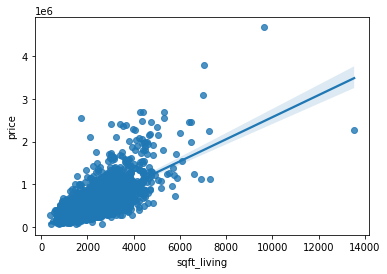

In [ ]:
sns.regplot(x = 'sqft_living', y = 'price', data = train.loc[train.price<5000000])

### <b>Pre-selección de variables:</b>
En muchos casos, la cantidad de variables que tendremos que evaluar será tanta que deberemos filtrar aquellas que identiquemos con menor potencial para predecir nuestro target.
Algunos criterios que podemos tomar, son umbrales de correlación y missing rate.

--- 

Ejemplo:

*   Aquellas variables con correlación  < 0.1 se van
*   Aquellas variables con missing rate > 0.9 se van


In [ ]:
feature_prefilter = list(set(univariate_II.loc[univariate_II.correl_abs >= 0.1].loc[univariate_II.missing_rate <= 0.9].feature.tolist()) - set([target])) 


In [ ]:
print(f'Cantidad de variables iniciales: {univariate_II.shape[0]}')
print(f'Cantidad de variables luego de pre-seleccion: {len(feature_prefilter)}')


Cantidad de variables iniciales: 13
Cantidad de variables luego de pre-seleccion: 8


## Analizando el target

In [ ]:
pddf[['price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4550.0,558026.801533,563932.859964,80000.0,326446.428572,465000.0,657500.0,26590000.0


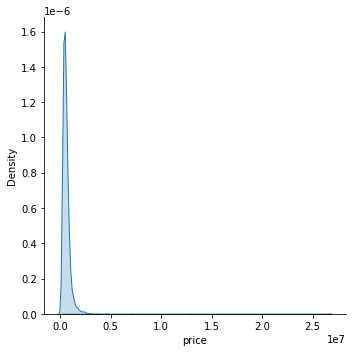

In [ ]:
# Gráfico de distribución 
sns.displot(pddf.price, kind="kde", fill=True)

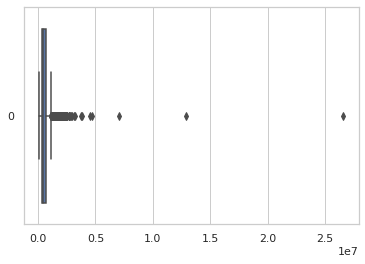

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price, orient="h")

## Tratamiento de outliers

---
El tratamiento de z-score asume que los datos siguen una distribución normal, en base a esto se trazaran límites que escapen de dicha distribución con cierta capadidad de confianza que nosotros mismos definiremos:

* LI = Mean - Z*desviacion_estandar
* LS = Mean + Z*desviacion_estandar

---



* Z = 1.64  (90% confianza) 
* Z = 1.96  (95% confianza) 
* Z = 2.576 (99% confianza) 



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:

# Tratamiento por z-score
upper_limit = np.mean(pddf.price) + 1.96*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 1.96*np.std(pddf.price)



In [ ]:
np.mean(pddf.price)

558026.8015333592

In [ ]:
lower_limit

-547160.1348601585

# Capping

Capping o trucar los valores extremos consiste en imputar valores de los límites a casos en los cuales escapen de estos.

Por ejemplo: si mi edad es 180 años y el límite superior es 80, automáticamente mi valor de edad será 80 años según este método.

In [ ]:
# Capping

pddf['price_t'] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)


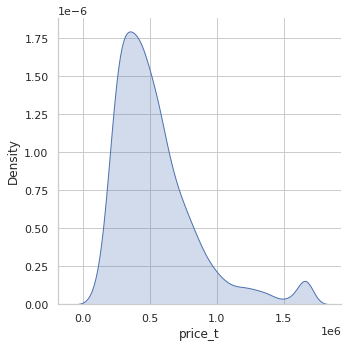

In [ ]:
# Gráfico de distribución 
sns.displot(pddf.price_t, kind="kde", fill=True)

<AxesSubplot:>

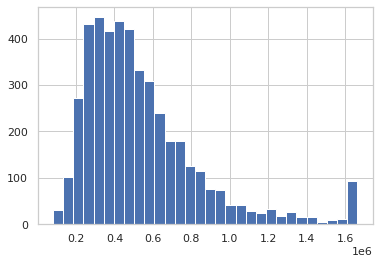

In [ ]:
pddf.price_t.hist(bins=30)

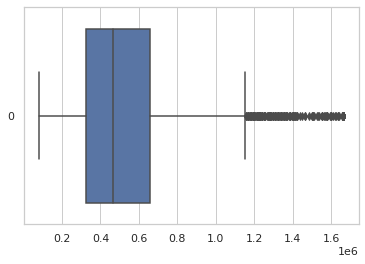

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price_t, orient="h")

## 3. Tratamiento de outliers sobre toda la data





<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()


In [ ]:
# Calculando los intervalos Z-score

univariate_II['li_zscore'] = univariate_II['mean'] - 1.96*univariate_II['std']
univariate_II['ls_zscore'] = univariate_II['mean'] + 1.96*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                            else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                            else x)
  return dataframe


In [ ]:
train_I = zscore(train, univariate_II, univariate_II.feature.tolist())
test_I  = zscore(test,  univariate_II, univariate_II.feature.tolist())

graficando sqft_living_tzscore (1/8)
graficando bedrooms_tzscore (2/8)
graficando waterfront_tzscore (3/8)
graficando sqft_above_tzscore (4/8)
graficando sqft_basement_tzscore (5/8)
graficando view_tzscore (6/8)
graficando floors_tzscore (7/8)
graficando bathrooms_tzscore (8/8)


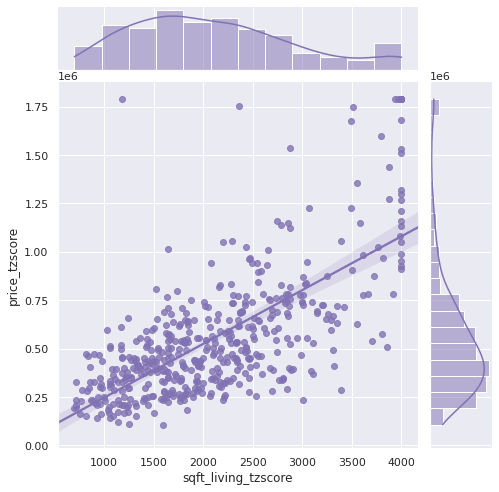

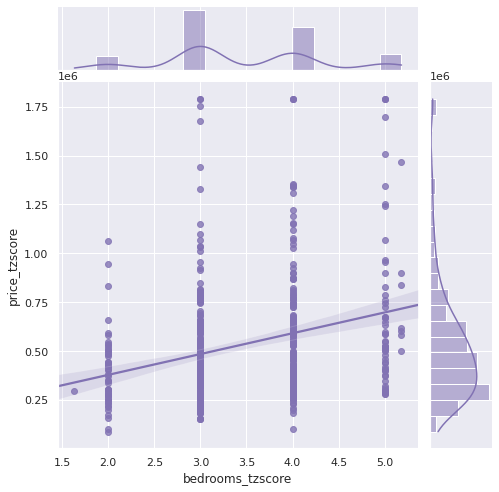

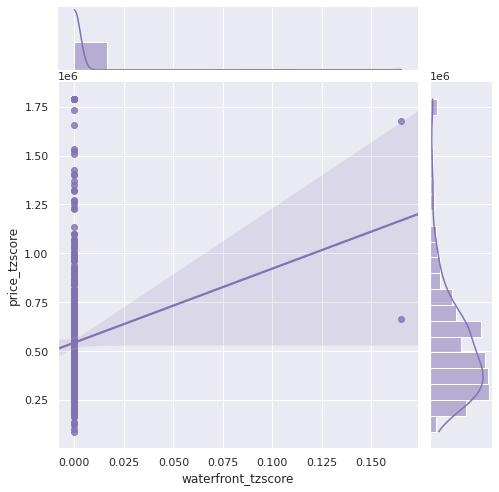

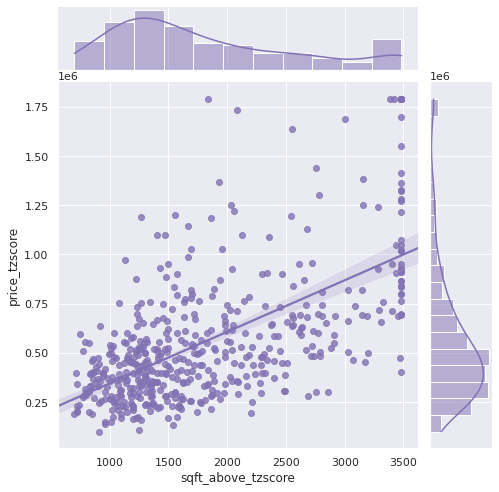

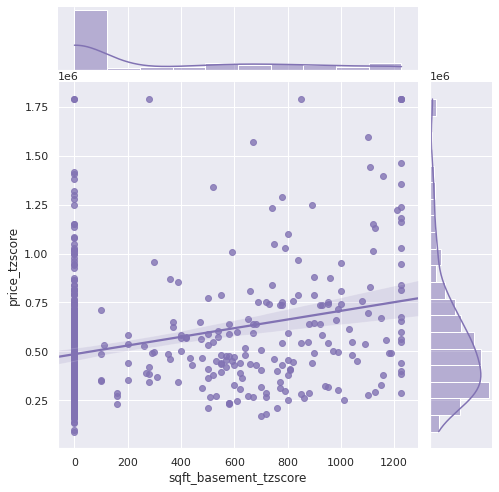

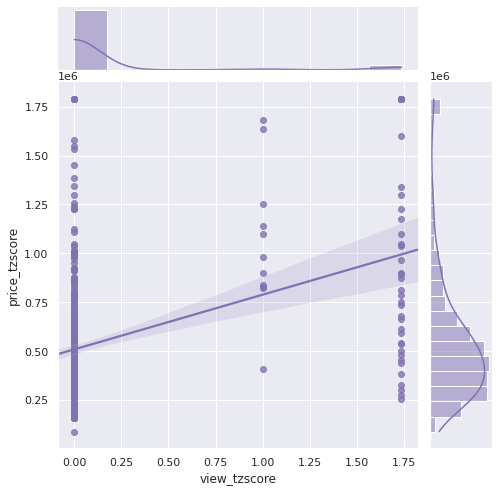

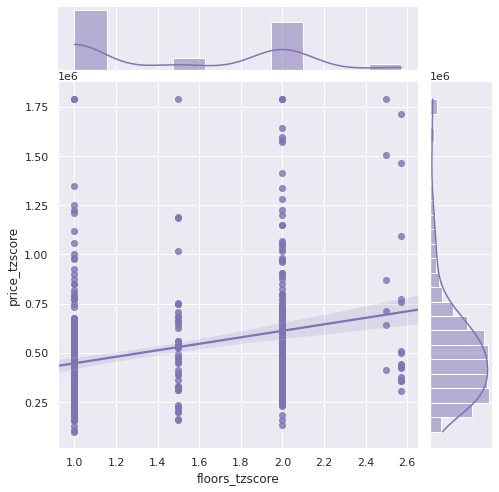

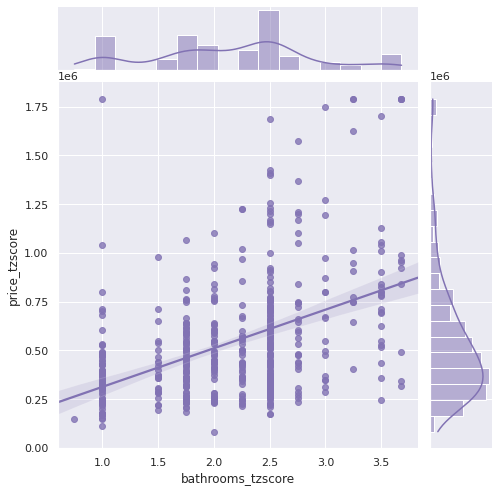

In [ ]:
# generación de gráficos
# primero crear una carpeta en path llamada graficos
sns.set(rc={'figure.figsize':(6, 4)})
featuresTograph = [x + '_tzscore' for x in feature_prefilter]
i = 0
for col in featuresTograph:
  i += 1
  print(f"graficando {col} ({i}/{len(featuresTograph)})")
  sns.jointplot(x = col, y = target + '_tzscore', data = train_I.sample(500), kind="reg", truncate=False, color="m", height=7).savefig(f"graficos/scatter_{col}.jpg")


## 3. Tratamiento de missigs


In [ ]:

train_II = train_I[[x + '_tzscore' for x in feature_prefilter]].fillna(train_I[[x + '_tzscore' for x in feature_prefilter]].median())
test_II  = test_I[[x + '_tzscore' for x in feature_prefilter]].fillna(train_I[[x + '_tzscore' for x in feature_prefilter]].median())



## 4. Estandarización

La estandarización es un tratamiento en la estadística que consiste en cambiarle la escala a las variables a una distribución con media 0 y desviación estandar 1.

Esto se logra facilmente aplicando la siguiente fórmula:



*   x_estandar = (x - promedio(x))/desviacion_est(x)

---

In [ ]:
train_III = (train_II - train_II.mean())/train_II.std()
test_III = (test_II - train_II.mean())/train_II.std()


## 5. Modelo de regresión lineal

In [ ]:
train_III

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(train_I[[target + '_tzscore']], 
             sm.add_constant(train_III))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     416.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:42:00   Log-Likelihood:                -43650.
No. Observations:                3185   AIC:                         8.732e+04
Df Residuals:                    3176   BIC:                         8.737e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[[target + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     476.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:48:41   Log-Likelihood:                -43650.
No. Observations:                3185   AIC:                         8.732e+04
Df Residuals:                    3177   BIC:                         8.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore', 'bedrooms_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[[target + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     540.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:54:39   Log-Likelihood:                -43672.
No. Observations:                3185   AIC:                         8.736e+04
Df Residuals:                    3178   BIC:                         8.740e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [ ]:
modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = modelo.coeficiente/modelo.coeficiente.sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo


,feature,coeficiente,peso
4,sqft_living_tzscore,104525.534115,0.320504
3,sqft_above_tzscore,71198.432896,0.218314
5,view_tzscore,53745.548822,0.164798
1,sqft_basement_tzscore,46555.621795,0.142752
6,waterfront_tzscore,25189.327451,0.077237
2,floors_tzscore,24914.636578,0.076395


## 6. Control de correlaciones

In [ ]:
train_III[variables_mod].corr()

,sqft_basement_tzscore,floors_tzscore,sqft_above_tzscore,sqft_living_tzscore,view_tzscore,waterfront_tzscore
sqft_basement_tzscore,1.000000,-0.289357,-0.125715,0.380818,0.292287,0.065665
floors_tzscore,-0.289357,1.000000,0.579654,0.376946,0.019359,0.000738
sqft_above_tzscore,-0.125715,0.579654,1.000000,0.858863,0.154690,0.049413
sqft_living_tzscore,0.380818,0.376946,0.858863,1.000000,0.283302,0.071874
view_tzscore,0.292287,0.019359,0.154690,0.283302,1.000000,0.260305
waterfront_tzscore,0.065665,0.000738,0.049413,0.071874,0.260305,1.000000


In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore', 'bedrooms_tzscore', 'sqft_above_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[[target + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     646.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:02:43   Log-Likelihood:                -43676.
No. Observations:                3185   AIC:                         8.736e+04
Df Residuals:                    3179   BIC:                         8.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [ ]:
train_III[variables_mod].corr()

,sqft_basement_tzscore,floors_tzscore,sqft_living_tzscore,view_tzscore,waterfront_tzscore
sqft_basement_tzscore,1.000000,-0.289357,0.380818,0.292287,0.065665
floors_tzscore,-0.289357,1.000000,0.376946,0.019359,0.000738
sqft_living_tzscore,0.380818,0.376946,1.000000,0.283302,0.071874
view_tzscore,0.292287,0.019359,0.283302,1.000000,0.260305
waterfront_tzscore,0.065665,0.000738,0.071874,0.260305,1.000000


## 7. Evaluación en test

In [ ]:
train_III[variables_mod]

In [ ]:
train_VI = sm.add_constant(train_III[variables_mod])
test_VI = sm.add_constant(test_III[variables_mod])

train_VI['prediction'] = res.predict(train_VI)
test_VI['prediction'] = res.predict(test_VI)

train_VI[target + '_tzscore'] = train_I[[target + '_tzscore']]
test_VI[target + '_tzscore'] = test_I[[target + '_tzscore']]


In [ ]:
from sklearn.metrics import r2_score

In [ ]:

print(f'R2 en train: {r2_score(train_VI[target + "_tzscore"], train_VI.prediction)}')
print(f'R2 en test:  {r2_score(test_VI[target + "_tzscore"], test_VI.prediction)}')


R2 en train: 0.5040958272897036
R2 en test:  0.48365244889018955


In [ ]:
test_VI[['prediction', target + '_tzscore']].head()

,prediction,price_tzscore
2039,539825.164571,809950.0
3215,453882.324282,437000.0
2457,829700.843961,622500.0
3053,496088.562967,550000.0
822,313820.279360,238000.0


In [ ]:
test_VI['error'] = test_VI['prediction'] - test_VI[target + '_tzscore']
test_VI['error_rel'] = test_VI['error']/test_VI[target + '_tzscore']

test_VI[['prediction', target + '_tzscore', 'error_rel']]

,prediction,price_tzscore,error_rel
2039,5.398252e+05,8.099500e+05,-0.333508
3215,4.538823e+05,4.370000e+05,0.038632
2457,8.297008e+05,6.225000e+05,0.332853
3053,4.960886e+05,5.500000e+05,-0.098021
822,3.138203e+05,2.380000e+05,0.318573
...,...,...,...
1621,4.629012e+05,5.600000e+05,-0.173391
2951,4.503548e+05,2.910000e+05,0.547611
2772,1.481313e+06,1.789486e+06,-0.172213
1161,2.711371e+05,3.200000e+05,-0.152696


In [ ]:
def rango_error(x):
  if abs(x) > 0.5:
    return '>+-50%'
  elif abs(x) >= 0.25:
    return '<+-50%'
  elif abs(x) < 0.25:
    return '<+-25%'


In [ ]:
test_VI['rango_error'] = test_VI.error_rel.apply(lambda x: rango_error(x))

In [ ]:
test_VI.groupby('rango_error')['error_rel'].count()

rango_error
<+-25%    673
<+-50%    414
>+-50%    278
Name: error_rel, dtype: int64

In [ ]:
673/(673+414+278)

0.49304029304029307

In [ ]:
414/(673+414+278)

0.3032967032967033